In [5]:
# Pandas is most commonly used for data wrangling and data manipulation purposes
# NumPy is a fundamental library for numerical computing in Python.Mathematical Operations, Arrays,Linear Algebra etc
#Removing Duplicates
#Fixing NULL values(Age, Department)
#Standardization of each value(Gender)
#Concatenate First Name and Last Name
#Add a new column(YearsAtCompany)
#STrength by Maritial Status

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [99]:
pd.reset_option('display.max_rows',None)
df = pd.read_csv("Sample_HR.csv")

# df = df.shape
# print(f"No of rows {df}")

# df = df[df.duplicated()].shape[0]

df = df.drop_duplicates()

df.shape

# df =  df[df["Age"].isnull()]
avg_age =  int(df["Age"].mean())

df["Age"] = df["Age"].fillna(avg_age)
df["Department"] = df["Department"].fillna("Data Engineering")
df['Gender'] = df['Gender'].replace({"M":"Male","F":"Female"})


df["Full Name"] =  df["First Name"] + ' '+df['Last Name']

columns = df.columns.tolist()
last_name_index = columns.index('Last Name')
columns.insert(last_name_index + 1,columns.pop(columns.index('Full Name')))
df = df[columns]

# Get the on of exprience
hire_date = pd.to_datetime(df['Hire_Date']).dt.year
current_year = datetime.now().year

df['YearOfCompany'] = current_year - hire_date

In [106]:
department_count

Department
TECH                909
Sales               446
Human Resources      63
Data Engineering     38
Manfacturing         14
Name: count, dtype: int64

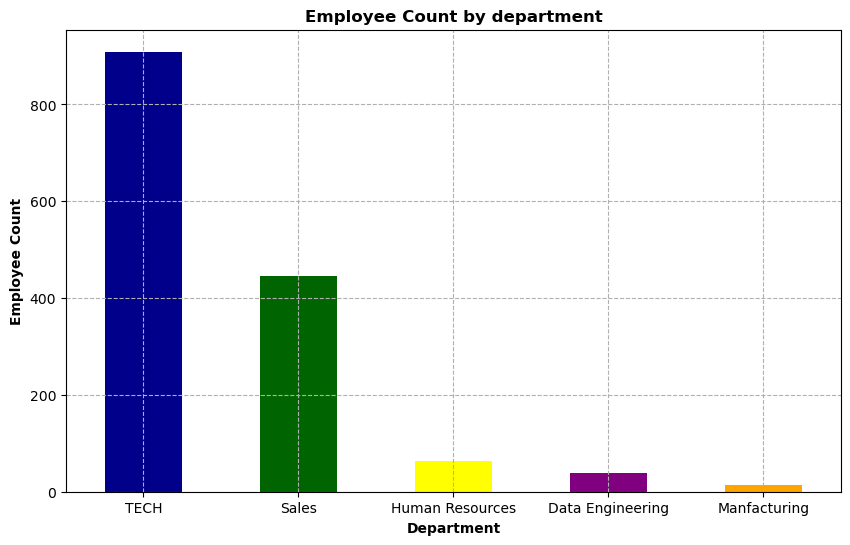

In [118]:
# Create a Bar Chart
department_count = df['Department'].value_counts()
plt.figure(figsize = (10,6))
color = ['darkblue','darkgreen','yellow','purple','orange']
department_count.plot(kind = 'bar', color = color)
plt.title("Employee Count by department", fontweight = 'bold')
plt.xlabel("Department",fontweight = 'bold')
plt.ylabel("Employee Count",fontweight = 'bold')
plt.xticks(rotation = 0)
plt.grid(True,linestyle  ='--')
plt.show()